In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

In [2]:
# Import our data into pandas from CSV
string_thing = 'Resources/Indicators_of_Anxiety_or_Depression.csv'
MentalHealth_df = pd.read_csv(string_thing, low_memory=False)

MentalHealth_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [3]:
# New dataframe to only keep the columns needed and drop null values in the data
MH_ByAge_df = MentalHealth_df[["Indicator", "Group", "Subgroup", "State", "Time Period Start Date", "Value","Low CI","High CI"]].dropna()

MH_ByAge_df

,Indicator,Group,Subgroup,State,Time Period Start Date,Value,Low CI,High CI
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,4/23/2020,23.5,22.7,24.3
1,Symptoms of Depressive Disorder,By Age,18 - 29 years,United States,4/23/2020,32.7,30.2,35.2
2,Symptoms of Depressive Disorder,By Age,30 - 39 years,United States,4/23/2020,25.7,24.1,27.3
3,Symptoms of Depressive Disorder,By Age,40 - 49 years,United States,4/23/2020,24.8,23.3,26.2
4,Symptoms of Depressive Disorder,By Age,50 - 59 years,United States,4/23/2020,23.2,21.5,25.0
...,...,...,...,...,...,...,...,...
12262,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,1/4/2023,28.6,24.9,32.6
12263,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,1/4/2023,31.3,28.7,34.1
12264,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,1/4/2023,37.9,32.7,43.4
12265,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,1/4/2023,28.1,24.3,32.1


In [4]:
# Filtering data to only keep 'Symptoms of Anxiety Disorder or Depressive Disorder' in the 'Indicator' column & 
# 'By Age' in the 'Group' column
anxiety_and_depression_df = MH_ByAge_df.loc[(MH_ByAge_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder') & (MH_ByAge_df['Group'] == 'By Age')]

# Grouping by "Time Period Start Date" so it only shows on date per age subgroup
anxiety_and_depression_df.groupby("Time Period Start Date").mean()

print(anxiety_and_depression_df)

                                               Indicator   Group  \
141    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
142    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
143    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
144    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
145    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
...                                                  ...     ...   
12192  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12193  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12194  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12195  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12196  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   

                 Subgroup          State Time Period Start Date  Value  \
141         18 - 29 years  United States              4/23/2020   46.8   
142         30 - 39 years  United S

C:\Users\cmart\AppData\Local\Temp\ipykernel_10696\2836257862.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anxiety_and_depression_df.groupby("Time Period Start Date").mean()


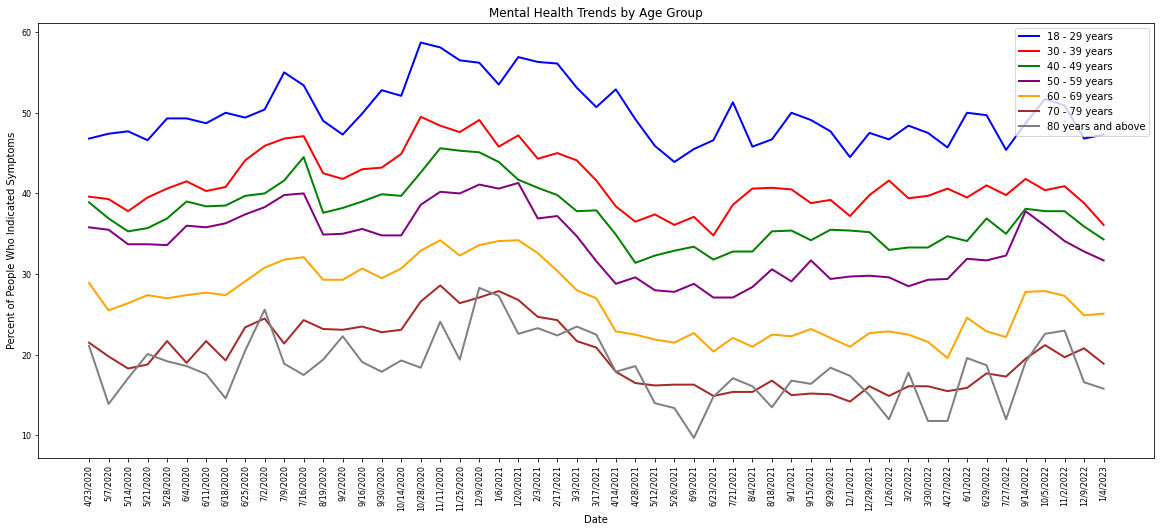

In [5]:
# Create a separate dataframe for each age subgroup
group1 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='18 - 29 years']
group2 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='30 - 39 years']
group3 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='40 - 49 years']
group4 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='50 - 59 years']
group5 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='60 - 69 years']
group6 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='70 - 79 years']
group7 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='80 years and above']

# Resize graph to fit data
plt.figure(figsize=(20, 8))

# Graph each data point
group1, = plt.plot(group1['Time Period Start Date'], group1['Value'], color="blue", label="18 - 29 years", linewidth=2, linestyle='-')
group2, = plt.plot(group2['Time Period Start Date'], group2['Value'], color="red", label="30 - 39 years", linewidth=2, linestyle='-')
group3, = plt.plot(group3['Time Period Start Date'], group3['Value'], color="green", label="40 - 49 years", linewidth=2, linestyle='-')
group4, = plt.plot(group4['Time Period Start Date'], group4['Value'], color="purple", label="50 - 59 years", linewidth=2, linestyle='-')
group5, = plt.plot(group5['Time Period Start Date'], group5['Value'], color="orange", label="60 - 69 years", linewidth=2, linestyle='-')
group6, = plt.plot(group6['Time Period Start Date'], group6['Value'], color="brown", label="70 - 79 years", linewidth=2, linestyle='-')
group7, = plt.plot(group7['Time Period Start Date'], group7['Value'], color="gray", label="80 years and above", linewidth=2, linestyle='-')

# Add title and labels to the plot
plt.title("Mental Health Trends by Age Group")
plt.xlabel("Date")
plt.ylabel("Percent of People Who Indicated Symptoms")

# Add a legend to the plot
plt.legend(loc="upper right")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set font size for x-axis labels
plt.tick_params(axis='both', labelsize=8)

# Add grid
# plt.grid(True)

plt.show()

In [6]:
# Filtering data to only keep 'Symptoms of Anxiety Disorder or Depressive Disorder' in the 'Indicator' column & 
# 'By Sex' in the 'Group' column
MH_BySex_df = MH_ByAge_df.loc[(MH_ByAge_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder') & (MH_ByAge_df['Group'] == 'By Sex')]

print(MH_BySex_df)

                                               Indicator   Group Subgroup  \
148    Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
149    Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
358    Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
359    Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
568    Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
...                                                  ...     ...      ...   
11649  Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
11963  Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
11964  Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   
12197  Symptoms of Anxiety Disorder or Depressive Dis...  By Sex     Male   
12198  Symptoms of Anxiety Disorder or Depressive Dis...  By Sex   Female   

               State Time Period Start Date  Value  Low CI  High CI  
148  

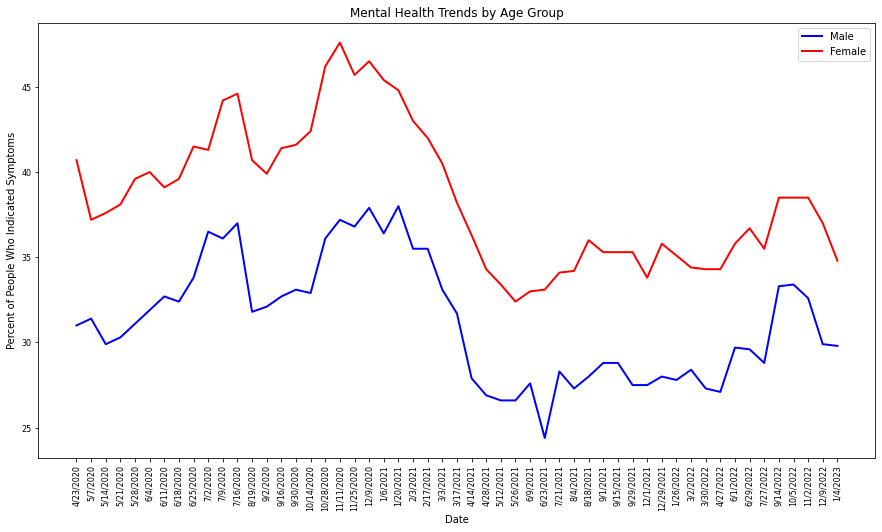

In [8]:
# MH_BySex_df['Time Period Start Date'] = pd.to_datetime(MH_BySex_df['Time Period Start Date'], format='%m/%d/%Y')

# Define the x and y values from the DataFrame
male = MH_BySex_df.loc[MH_BySex_df['Subgroup']=='Male']
female = MH_BySex_df.loc[MH_BySex_df['Subgroup']=='Female']

# Resize graph to fit data
plt.figure(figsize=(15, 8))

# Graph each data point
male, = plt.plot(male['Time Period Start Date'], male['Value'], color="blue", label="Male", linewidth=2, linestyle='-')
female, = plt.plot(female['Time Period Start Date'], female['Value'], color="red", label="Female", linewidth=2, linestyle='-')

# Add title and labels to the plot
plt.title("Mental Health Trends by Age Group")
plt.xlabel("Date")
plt.ylabel("Percent of People Who Indicated Symptoms")

# Add a legend to the plot
plt.legend(loc="upper right")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set font size for x-axis labels
plt.tick_params(axis='both', labelsize=8)

# Show the plot
plt.show()

In [ ]:
# https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp